### Machine Learning - Final Assignmnet 

* Leon Surwald 
* Juan Gesino 
* Carlo Bretti  
* Max Beauroyre

For this Machine Learning assignment we are going to be working with a dastaset scraped from Booking, with the data being owned by Booking.com. The dataset was provided as part of the course "Machine Learning" at the University of Amsterdam. 

### **Goal of the Assignmnet**
* Our aim for this project is to build a recommender system that will suggest a fixed number of hotels for different cities based on any hotel inputed. 

### **Data Context**
* This dataset contains 515,000 customer reviews and scoring of 1493 luxury hotels across Europe. 

### Data Content

The csv file contains 17 fields. The description of each field is as below:

* Hotel_Address: Address of hotel.
* Review_Date: Date when reviewer posted the corresponding review.
* Average_Score: Average Score of the hotel, calculated based on the latest comment in the last year.
* Hotel_Name: Name of Hotel
* Reviewer_Nationality: Nationality of Reviewer
* Negative_Review: Negative Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Negative'
* Review_Total_Negative_Word_Counts: Total number of words in the negative review.
* Positive_Review: Positive Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Positive'
* Review_Total_Positive_Word_Counts: Total number of words in the positive review.
* Reviewer_Score: Score the reviewer has given to the hotel, based on his/her experience
* Total_Number_of_Reviews_Reviewer_Has_Given: Number of Reviews the reviewers has given in the past.
* Total_Number_of_Reviews: Total number of valid reviews the hotel has.
* Tags: Tags reviewer gave the hotel.
* days_since_review: Duration between the review date and scrape date.
* Additional_Number_of_Scoring: There are also some guests who just made a scoring on the service rather than a review. This number indicates how many valid scores without review in there.
* lat: Latitude of the hotel
* lng: longtitude of the hotel




### Importing and loading the file

In [1]:
## Uncomment to install dependencies
# !pip install wordcloud
# !pip install gensim

In [2]:
# Data structures
import re
import string
from inspect import signature
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Word cloud
from wordcloud import WordCloud

# NLP/Snetiment
import nltk
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer, SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# doc2vec
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Models
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score, precision_recall_curve

# Globals
FIG_SIZE = (10,8)
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/juangesino/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juangesino/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/juangesino/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/juangesino/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Read the csv and turning it into a DataFrame
Hotel_Reviews = pd.read_csv("Hotel_Reviews.csv")

#### Section 1: Importing and Describing the Dataset

In [4]:
Hotel_Reviews.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [5]:
Hotel_Reviews.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [6]:
Hotel_Reviews.shape

(515738, 17)

In [7]:
Hotel_Reviews.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


#### Section 2: Data Cleaning and Preprocessing

In [8]:
Hotel_Reviews.dtypes

Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
dtype: object

From a quick look at the data we need to change the data for Review Data, from object to datetime.

In [9]:
Hotel_Reviews['Review_Date'] = pd.to_datetime(Hotel_Reviews['Review_Date'])

#####  Checking for missing values

In [10]:
Hotel_Reviews.isna().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

By looking at the output from the code box above we can see how we have missing values for the langitude and longitude of some of the hotels. 

In [11]:
# Getting a list of the hotels that have missing values
missing_lat_hotels = Hotel_Reviews[Hotel_Reviews['lat'].isnull()]['Hotel_Name'].unique()
missing_lat_hotels

array(['Mercure Paris Gare Montparnasse', 'Holiday Inn Paris Montmartre',
       'Maison Albar Hotel Paris Op ra Diamond',
       'NH Collection Barcelona Podium', 'City Hotel Deutschmeister',
       'Hotel Park Villa', 'Fleming s Selection Hotel Wien City',
       'Cordial Theaterhotel Wien', 'Hotel Daniel Vienna', 'Roomz Vienna',
       'Renaissance Barcelona Hotel',
       'Austria Trend Hotel Schloss Wilhelminenberg Wien',
       'Hotel Advance', 'Derag Livinghotel Kaiser Franz Joseph Vienna',
       'Hotel City Central', 'Hotel Pension Baron am Schottentor',
       'Hotel Atlanta'], dtype=object)

In [12]:
missing_lng_hotels = Hotel_Reviews[Hotel_Reviews['lng'].isnull()]['Hotel_Name'].unique()
missing_lng_hotels

array(['Mercure Paris Gare Montparnasse', 'Holiday Inn Paris Montmartre',
       'Maison Albar Hotel Paris Op ra Diamond',
       'NH Collection Barcelona Podium', 'City Hotel Deutschmeister',
       'Hotel Park Villa', 'Fleming s Selection Hotel Wien City',
       'Cordial Theaterhotel Wien', 'Hotel Daniel Vienna', 'Roomz Vienna',
       'Renaissance Barcelona Hotel',
       'Austria Trend Hotel Schloss Wilhelminenberg Wien',
       'Hotel Advance', 'Derag Livinghotel Kaiser Franz Joseph Vienna',
       'Hotel City Central', 'Hotel Pension Baron am Schottentor',
       'Hotel Atlanta'], dtype=object)

We have obtained the hotels that missing values for either langitude or longitude and now we will proceed to manually impute those values. 

We did this by searaching the geospatial coordinates associated with each of the hotels, and storing them into our dataframe. 

To make sure that this was done correctly we perform an additional check for missing values.

In [13]:
loc_lat = {
    'Fleming s Selection Hotel Wien City':48.209270,
    'Hotel City Central':48.2136,
    'Hotel Atlanta':48.210033,
    'Maison Albar Hotel Paris Op ra Diamond':48.875343,
    'Hotel Daniel Vienna':48.1888,
    'Hotel Pension Baron am Schottentor':48.216701,
    'Austria Trend Hotel Schloss Wilhelminenberg Wien':48.2195,
    'Derag Livinghotel Kaiser Franz Joseph Vienna':48.245998,
    'NH Collection Barcelona Podium':41.3916,
    'City Hotel Deutschmeister':48.22088,
    'Hotel Park Villa':48.233577,
    'Cordial Theaterhotel Wien':48.209488,
    'Holiday Inn Paris Montmartre':48.888920,
    'Roomz Vienna':48.186605,
    'Mercure Paris Gare Montparnasse':48.840012,
    'Renaissance Barcelona Hotel':41.392673,
    'Hotel Advance':41.383308
}
loc_lng ={
    'Fleming s Selection Hotel Wien City':16.353479,
    'Hotel City Central':16.3799,
    'Hotel Atlanta':16.363449,
    'Maison Albar Hotel Paris Op ra Diamond':2.323358,
    'Hotel Daniel Vienna':16.3840,
    'Hotel Pension Baron am Schottentor':16.359819,
    'Austria Trend Hotel Schloss Wilhelminenberg Wien':16.2856,
    'Derag Livinghotel Kaiser Franz Joseph Vienna':16.341080,
    'NH Collection Barcelona Podium':2.1779,
    'City Hotel Deutschmeister':16.36663,
    'Hotel Park Villa':16.345682,
    'Cordial Theaterhotel Wien':16.351585,
    'Holiday Inn Paris Montmartre':2.333087,
    'Roomz Vienna':16.420643,
    'Mercure Paris Gare Montparnasse':2.323595,
    'Renaissance Barcelona Hotel':2.167494,
    'Hotel Advance':2.162828
}

In [14]:
Hotel_Reviews['lat'] = Hotel_Reviews['lat'].fillna(Hotel_Reviews['Hotel_Name'].apply(lambda x: loc_lat.get(x)))
#filling longitude information
Hotel_Reviews['lng'] = Hotel_Reviews['lng'].fillna(Hotel_Reviews['Hotel_Name'].apply(lambda x: loc_lng.get(x)))

In [15]:
Hotel_Reviews.isna().sum()

Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
dtype: int64

In [16]:
#Removing duplicates from the dataset
print(sum(Hotel_Reviews.duplicated()))
Hotel_Reviews = Hotel_Reviews.drop_duplicates()
print('The size of our dataset after removing duplicates is: {}'.format(Hotel_Reviews.shape))

526
The size of our dataset after removing duplicates is: (515212, 17)


We found 526 duplicated observations in our dataset, such values have now been dropped from our dataframe "Hotel_Reviews"

In [17]:
#Removing white spaces from Reviewer Nationality 
cleaned_nat = [str(row).strip() for row in Hotel_Reviews['Reviewer_Nationality']]
Hotel_Reviews['Reviewer_Nationality'] = cleaned_nat

In [18]:
# Delete "days" word from 'days_since_review' column.
cleaned_days = Hotel_Reviews['days_since_review'].str.extract('(\d+)').astype('int32')
Hotel_Reviews['days_since_review'] = cleaned_days

### Section 3: Exploratory Data Analysis

We will be exploring our data visually and investigating any interesting associations that will help answer our research question, or provide future the groundwork for future research.

This will be done in a question-answer format.

In [19]:
# choords = Hotel_Reviews

In [20]:
# import folium as f
# from folium.plugins import MarkerCluster

# m = f.Map(location=[choords['lat'].mean(), choords['lng'].mean()], zoom_start=5)

In [21]:
# mc = MarkerCluster()

# for index, row in choords.iterrows():
#     mc.add_child(f.Marker(location=[row["lat"], row["lng"]],popup='<i>{}</i>'.format(row['Hotel_Name'])))

# m.add_child(mc)
# m.save('map.html')
# m

**Which hotels have the most reviews?**

In [22]:
# with .value_counts() we count the number of occurencies for each one of the used values.
Hotel_Reviews['Hotel_Name'].value_counts().head(20)

Britannia International Hotel Canary Wharf           4789
Strand Palace Hotel                                  4256
Park Plaza Westminster Bridge London                 4169
Copthorne Tara Hotel London Kensington               3577
DoubleTree by Hilton Hotel London Tower of London    3212
Grand Royale London Hyde Park                        2958
Holiday Inn London Kensington                        2768
Hilton London Metropole                              2628
Millennium Gloucester Hotel London                   2565
Intercontinental London The O2                       2551
Park Grand Paddington Court                          2288
Hilton London Wembley                                2227
Park Plaza County Hall London                        2223
Blakemore Hyde Park                                  2178
Park Plaza London Riverbank                          2167
M by Montcalm Shoreditch London Tech City            2155
DoubleTree by Hilton London Docklands Riverside      2147
St James Court

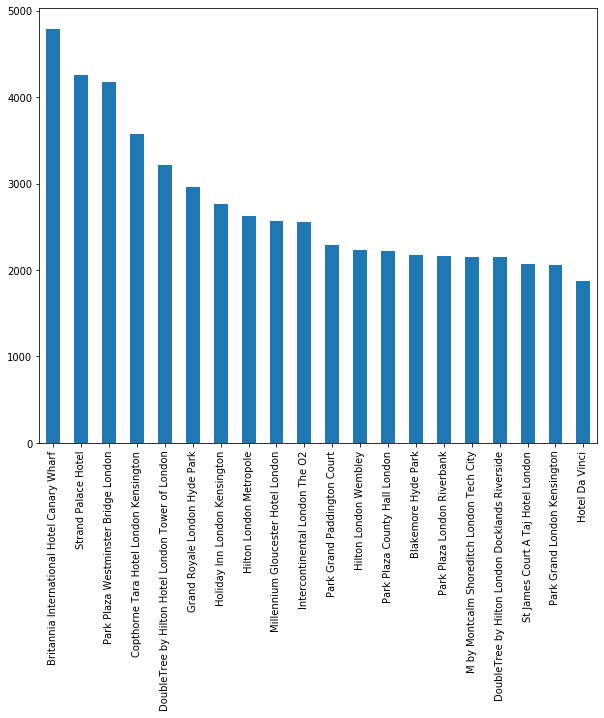

In [23]:
Hotel_Reviews['Hotel_Name'].value_counts().head(20).plot(kind='bar',figsize=FIG_SIZE)

**In what time period do these reviews take place?**

In [24]:
Hotel_Reviews['Review_Date'].min().strftime('%m-%d-%Y')

'08-04-2015'

In [25]:
Hotel_Reviews['Review_Date'].max().strftime('%m-%d-%Y')

'08-03-2017'

**On what days were most reviews done?**

In [26]:
Hotel_Reviews['Review_Date'].value_counts().head(10)

2017-08-02    2584
2016-09-15    2304
2017-04-05    2284
2016-08-30    1959
2016-02-16    1939
2016-07-05    1903
2016-05-31    1859
2016-12-05    1801
2016-07-12    1800
2016-08-02    1781
Name: Review_Date, dtype: int64

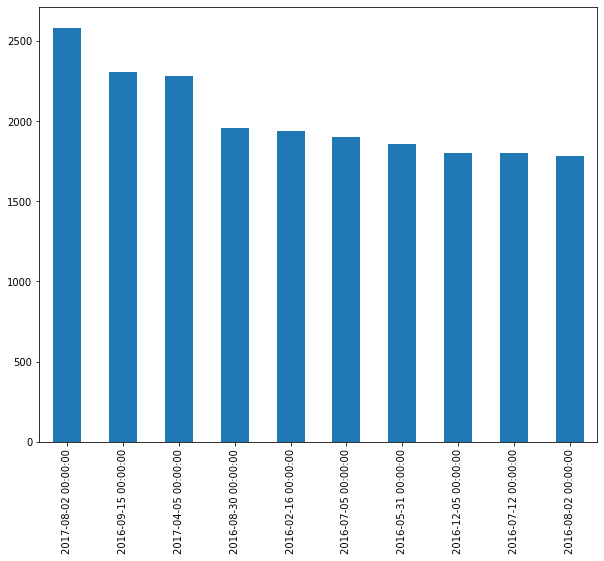

In [27]:
Hotel_Reviews['Review_Date'].value_counts().head(10).plot(kind='bar', figsize=FIG_SIZE)

**How are then the reviews spread over time?**

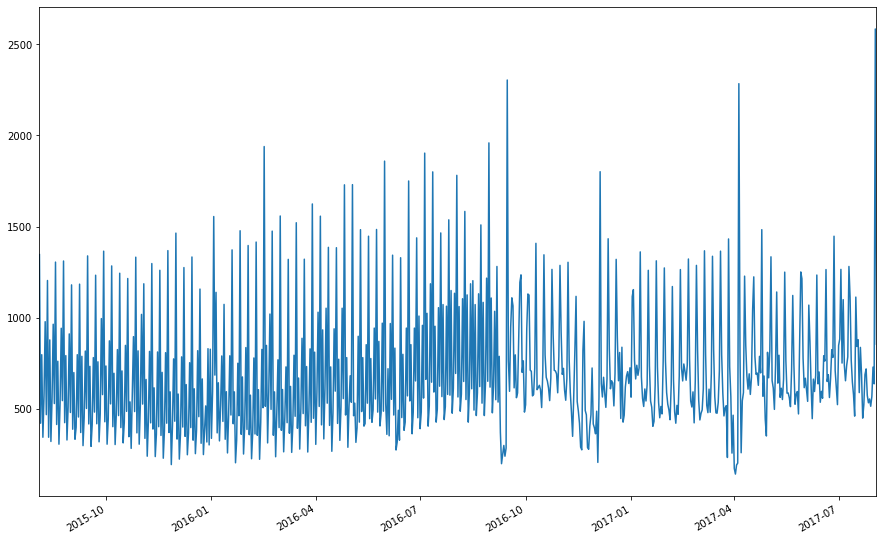

In [28]:
Hotel_Reviews['Review_Date'].value_counts().plot(figsize=(15,10))

**What is the distribution for the rating scores?**

In [29]:
Hotel_Reviews['Average_Score'].describe()

count    515212.000000
mean          8.397767
std           0.547952
min           5.200000
25%           8.100000
50%           8.400000
75%           8.800000
max           9.800000
Name: Average_Score, dtype: float64

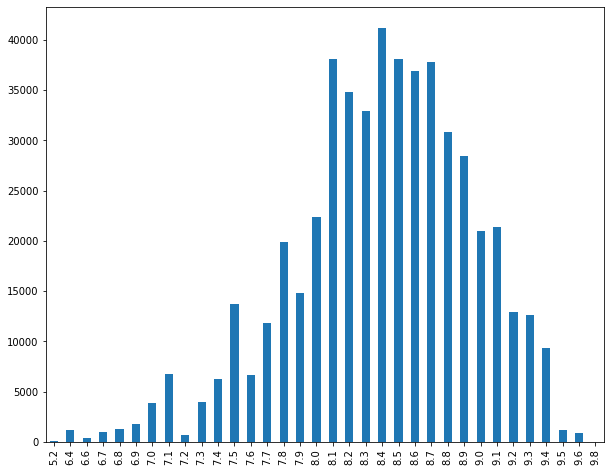

In [30]:
Hotel_Reviews['Average_Score'].value_counts().sort_index().plot(kind='bar',figsize=FIG_SIZE)

In [31]:
# We count how many reviews are in the range [8.0,9.0].
t = Hotel_Reviews['Average_Score'].value_counts().sort_index()[8.0 : 9.0].sum()
t

362482

In [32]:
percentage = t / Hotel_Reviews['Average_Score'].count() * 100
print("In this range from 8.0 to 9.0 of score fall the {:.2f}% of the reviews.".format(percentage))

In this range from 8.0 to 9.0 of score fall the 70.36% of the reviews.


**What nationalities review the most?**

In [33]:
Hotel_Reviews['Reviewer_Nationality'].value_counts().head(10)

United Kingdom              245110
United States of America     35349
Australia                    21648
Ireland                      14814
United Arab Emirates         10229
Saudi Arabia                  8940
Netherlands                   8757
Switzerland                   8669
Germany                       7929
Canada                        7883
Name: Reviewer_Nationality, dtype: int64

**How many reviews have unique people given?**

In [34]:
Hotel_Reviews['Total_Number_of_Reviews_Reviewer_Has_Given'].value_counts().head(10)

1     154506
2      67011
3      46802
4      34991
5      27604
6      22593
7      18599
8      16126
9      13526
10     11702
Name: Total_Number_of_Reviews_Reviewer_Has_Given, dtype: int64

We see that there are 154640 reviews given by people that are making their first review.

In [35]:
dataframe_length = Hotel_Reviews['Hotel_Name'].count()
percentage = Hotel_Reviews['Total_Number_of_Reviews_Reviewer_Has_Given'].value_counts().iloc[0]
print("The percentage of users reviewing for the first time in the dataframe is {:.2f}%".format(percentage / dataframe_length * 100))

The percentage of users reviewing for the first time in the dataframe is 29.99%


**Where are most of the hotels located?**

Let's first extract the country the hotel is at

In [36]:
countries = Hotel_Reviews['Hotel_Address'].map(lambda x: x.split()[-1])
countries = countries.map(lambda x: 'United Kingdom' if x == 'Kingdom' else x)
countries = countries.map(lambda x: 'United Kingdom' if x == 'UK' else x)
Hotel_Reviews['Hotel_Country'] = countries

Cluster some locations

In [37]:
has_sea = ['Spain', 'United Kingdom', 'Netherlands']
Hotel_Reviews['Country_Sea'] = Hotel_Reviews['Hotel_Country'].map(lambda x: x in has_sea)

In [38]:
Hotel_Reviews['Hotel_Country'].describe()

count             515212
unique                 6
top       United Kingdom
freq              262298
Name: Hotel_Country, dtype: object

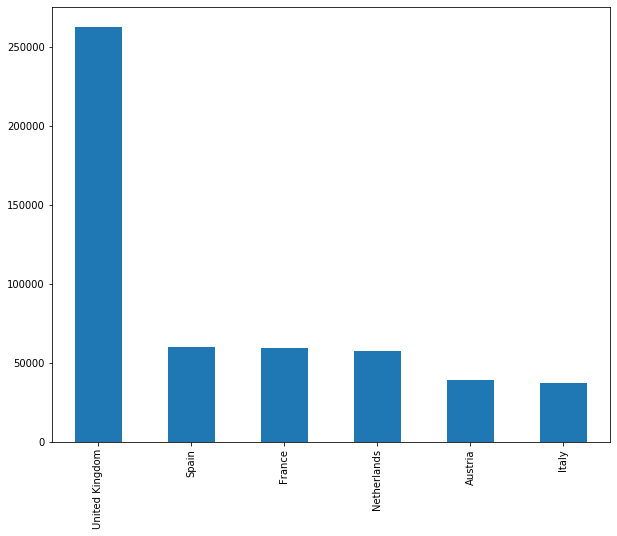

In [39]:
Hotel_Reviews['Hotel_Country'].value_counts().head(10).plot(kind='bar', figsize=FIG_SIZE)

**What tags are used the most in reviews?**

In [40]:
# 'Tag' column has an array formatted as string, so we've used Regex to fetch the contents.
tag = pd.Series(re.findall(r'[\']\s([\w\s]+)\s[\']',''.join(Hotel_Reviews.Tags))).value_counts()
tag.head()

Leisure trip                      417355
Submitted from a mobile device    307355
Couple                            252005
Stayed 1 night                    193497
Stayed 2 nights                   133809
dtype: int64

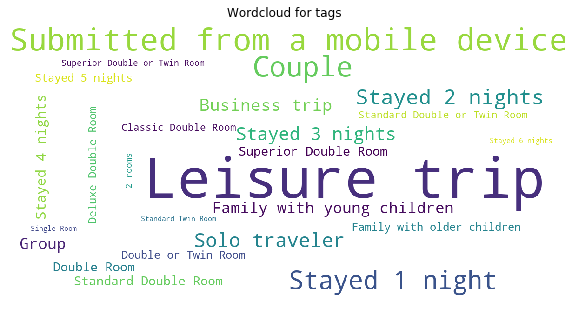

In [41]:
wordcloud = WordCloud(background_color='white', scale=3, max_font_size=40, max_words=25).generate_from_frequencies(tag)
wordcloud.recolor(random_state=1)
plt.figure(1, figsize=FIG_SIZE)
plt.imshow(wordcloud)
plt.title("Wordcloud for tags ")
plt.axis("off")
plt.show()

* As we can see, most of the reviews are related to Leisure Trip. 'Couple' is bigger that 'Solo traveler' this means that there are more trip done in 2 with respect to the ones done alone. 

* Interestingly the tag 'Submitted from a mobile devide' is big, in the next quesiton we'll get the number and percentage of reviews submitted by smartphone. This is important expecially for booking sites, to encourgae them to have a nice and user-friendly app. Other thing to notice is that the longer the trip is, the smaller the tag 'Stayed x night' is.

**How many reviews were made from a smartphone?**

In [42]:
tag['Submitted from a mobile device']

307355

In [43]:
print("The {:.2f}% of reviews are from mobile devices.".format(tag['Submitted from a mobile device'] / dataframe_length * 100))

The 59.66% of reviews are from mobile devices.


**How many positive reviews do we have in the dataset?**

* In order to answer this question we need to use the data contained in the column Review_Total_Positive_Word_Counts, when the value is equals to zero it means this is not a positive review.

In [44]:
Hotel_Reviews['Review_Total_Positive_Word_Counts'].value_counts().head()

0    35904
6    26887
5    26809
4    24624
7    24517
Name: Review_Total_Positive_Word_Counts, dtype: int64

We have 35946 reviews with positive words count equal to zero, this means that they are completely negative reviews.

In [45]:
df = Hotel_Reviews.query('Review_Total_Positive_Word_Counts == 0')[['Negative_Review', 'Positive_Review']]
df.head()

,Negative_Review,Positive_Review
8,Even though the pictures show very clean room...,No Positive
32,Our bathroom had an urine order Shower was ve...,No Positive
98,Got charged 50 for a birthday package when it...,No Positive
121,The first room had steep steps to a loft bed ...,No Positive
134,Foyer was a mess Only place to relax was the ...,No Positive


* So, in order to find the number of positive reviews we need to compute the number of rows with **Review_Total_Negative_Word_Counts** equals to zero.

In [46]:
Hotel_Reviews['Review_Total_Negative_Word_Counts'].value_counts().head()

0    127757
2     24631
3     18126
6     17726
5     16788
Name: Review_Total_Negative_Word_Counts, dtype: int64

* Their number is 127890 but at this point we've found a problem. 
* If we have 127890 positive reviews and 35946 negative in total we should have 127890 + 35946 = 163836 reviews but we know that our dataset has much more rows (515738). 
* Clearly not all the reviews in the dataset have either the 'Negative_Review' or the 'Positive_Review' empty, but the fact that only 163836 out of 515738 have is strange. In the following cells we try to investigate this problem.

In [47]:
Hotel_Reviews.query('Review_Total_Negative_Word_Counts == 1')[['Negative_Review', 'Review_Total_Negative_Word_Counts']]

,Negative_Review,Review_Total_Negative_Word_Counts


There are no rows with only 1 word in it.

In [48]:
Hotel_Reviews.query('Review_Total_Negative_Word_Counts == 2').head()[['Negative_Review', 'Review_Total_Negative_Word_Counts']]

,Negative_Review,Review_Total_Negative_Word_Counts
288,Nothing,2
308,Construction,2
530,Nothing,2
574,Nothing,2
606,nothing,2


* This is the first problem that we've found, there are reviews with Negative_Review = "Nothing" or "nothing" that should be classified as positive but, given the fact that they have Review_Total_Negative_Word_Counts == 2 they are not. Another fact that arises is that we have count of words equal to 2 but the word is only one ("nothing" or "Nothing"). This probably means that there are whitespaces counted as word.

In [49]:
Hotel_Reviews.query('Review_Total_Negative_Word_Counts == 3').head()[['Negative_Review', 'Review_Total_Negative_Word_Counts']]

,Negative_Review,Review_Total_Negative_Word_Counts
24,Nothing,3
228,n a,3
263,Loud aircondition,3
268,Nothing,3
283,Nothing,3


Also when the count is 3 we have the problem described above. We have also the "n a" negative review that should be classified in a positive review.

In [50]:
Hotel_Reviews.query('Review_Total_Negative_Word_Counts == 4').head()[['Negative_Review', 'Review_Total_Negative_Word_Counts']]

,Negative_Review,Review_Total_Negative_Word_Counts
33,Please see above,4
231,No bad experiences,4
258,Unusual room layout,4
291,Breakfast poor,4
326,Service in reataurant,4


"No bad experiences" is another keyword that we should use for classifying the reviews.

In [51]:
Hotel_Reviews.query('Review_Total_Negative_Word_Counts == 5').head()[['Negative_Review', 'Review_Total_Negative_Word_Counts']]

,Negative_Review,Review_Total_Negative_Word_Counts
10,Nothing all great,5
52,I loved everything,5
272,check in time 3pm,5
293,Nothing it was perfect,5
295,Hotel under renovation,5


"Nothing all great" and "Nothing it was perfect" are other sentences that sould be used for classifying the reviews. The creatore of dateset supposed that when 'Review_Total_Negative_Word_Counts' was equals to zero, the review was positive. But, as we've showed, this is not true because there are different rows with inconsistent data, suck as "nothing", "Nothing", "n a", all of them could be found in the dataset with whitespace/s. From this problem we can deduce that we can't used the word count for computing neither the completely negative nor the completely positive.

In [52]:
# We've removed the whitespaces in the fields 'Negative_Review' and 'Positive_Review'.
Hotel_Reviews['Negative_Review'] = [x.lower().strip() for x in Hotel_Reviews['Negative_Review']]
Hotel_Reviews['Positive_Review'] = [x.lower().strip() for x in Hotel_Reviews['Positive_Review']]

Hotel_Reviews[['Negative_Review','Positive_Review']].head()

,Negative_Review,Positive_Review
0,i am so angry that i made this post available ...,only the park outside of the hotel was beautiful
1,no negative,no real complaints the hotel was great great l...
2,rooms are nice but for elderly a bit difficult...,location was good and staff were ok it is cute...
3,my room was dirty and i was afraid to walk bar...,great location in nice surroundings the bar an...
4,you when i booked with your company on line yo...,amazing location and building romantic setting


Given the previously mentioned problems, we've decided to classify the reviews in positive and negative ones by using the Reviewer_Score field availabled for each review. This score has a value between 0 (really bad) and 10 (really good), we set the boundaries of the bad reviews for the interval [0 ,5] and for the good ones to (5,10].

In [53]:
Hotel_Reviews.query('Reviewer_Score < 5').head()[['Negative_Review', 'Positive_Review']]

,Negative_Review,Positive_Review
0,i am so angry that i made this post available ...,only the park outside of the hotel was beautiful
3,my room was dirty and i was afraid to walk bar...,great location in nice surroundings the bar an...
6,cleaner did not change our sheet and duvet eve...,the room is spacious and bright the hotel is l...
12,the floor in my room was filfy dirty very basi...,comfy bed good location
21,our room was an overrated disaster room 231 di...,the breakfast was the only positive element of...


In [54]:
# We create 2 columns for the 'classification'.
Hotel_Reviews['Is_Positive'] = 0
Hotel_Reviews['Is_Negative'] = 0

Hotel_Reviews['Is_Positive'] =  Hotel_Reviews['Reviewer_Score'].apply(lambda value: 1 if value>=5 else 0)
Hotel_Reviews['Is_Negative'] =  Hotel_Reviews['Reviewer_Score'].apply(lambda value: 1 if value<5 else 0)

Hotel_Reviews.head()[['Positive_Review','Negative_Review','Is_Positive','Is_Negative','Reviewer_Score']]

,Positive_Review,Negative_Review,Is_Positive,Is_Negative,Reviewer_Score
0,only the park outside of the hotel was beautiful,i am so angry that i made this post available ...,0,1,2.9
1,no real complaints the hotel was great great l...,no negative,1,0,7.5
2,location was good and staff were ok it is cute...,rooms are nice but for elderly a bit difficult...,1,0,7.1
3,great location in nice surroundings the bar an...,my room was dirty and i was afraid to walk bar...,0,1,3.8
4,amazing location and building romantic setting,you when i booked with your company on line yo...,1,0,6.7


In [55]:
# We check that each row has been classified.
dataframe_length == Hotel_Reviews['Is_Positive'].sum() + Hotel_Reviews['Is_Negative'].sum()

True

**What hotel has the most negative reviews?**

In [56]:
df_count = Hotel_Reviews.groupby(['Hotel_Name'])['Is_Positive','Is_Negative'].sum()
df_count.sort_values(by=['Is_Negative'],ascending=False).head()

,Is_Positive,Is_Negative
Hotel_Name,,
Britannia International Hotel Canary Wharf,3891,898
Hilton London Metropole,2283,345
Grand Royale London Hyde Park,2695,263
Bloomsbury Palace Hotel,1048,225
Commodore Hotel,730,223


In [57]:
df_count['Sum'] = df_count.sum(axis=1,numeric_only=True)
df_count = df_count.sort_values(by='Sum',ascending=False)
df_count.drop('Sum',inplace=True,axis=1)

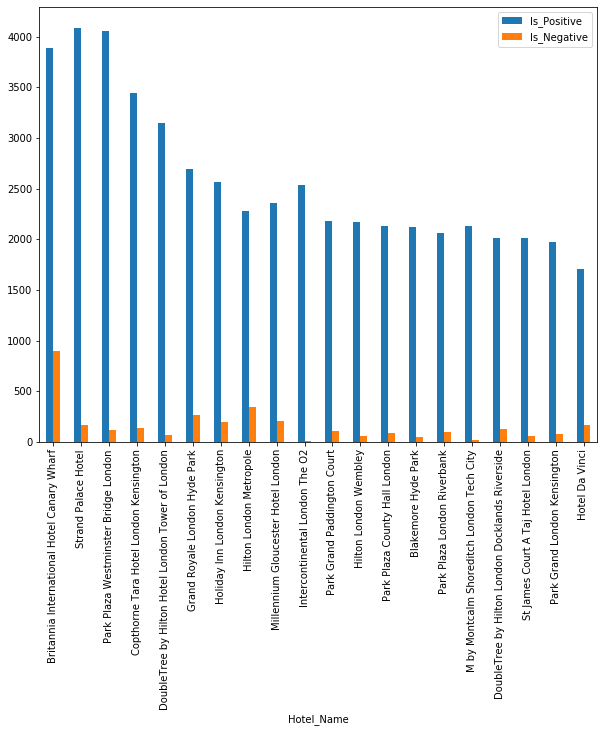

In [58]:
df_count.head(20).plot(kind='bar',figsize=FIG_SIZE)

**How does nationality affect the review score?**

* We are using the hotel with the most reviews, as it has the largest sample of both positive and negative reviews

In [59]:
Hotel_Reviews["Reviewer_Nationality"] = Hotel_Reviews["Reviewer_Nationality"].str.strip()
Hotel_Reviews["Reviewer_Tourist"] = Hotel_Reviews["Hotel_Country"] != Hotel_Reviews["Reviewer_Nationality"]

In [60]:
df = Hotel_Reviews.query('Hotel_Name == "Britannia International Hotel Canary Wharf"')
df = df.groupby(by='Reviewer_Nationality')['Reviewer_Score'].agg(["count", "mean"])
df.head()

,count,mean
Reviewer_Nationality,,
,3,6.8
Albania,2,8.1
Algeria,1,3.3
Andorra,1,9.6
Argentina,2,7.3


In [61]:
df = df.sort_values(by='mean', ascending=False).query('count>=20')
df.head()

,count,mean
Reviewer_Nationality,,
United Kingdom,3833,6.969736
Italy,44,6.793182
Ireland,116,6.695690
Spain,31,6.500000
Belgium,27,6.340741


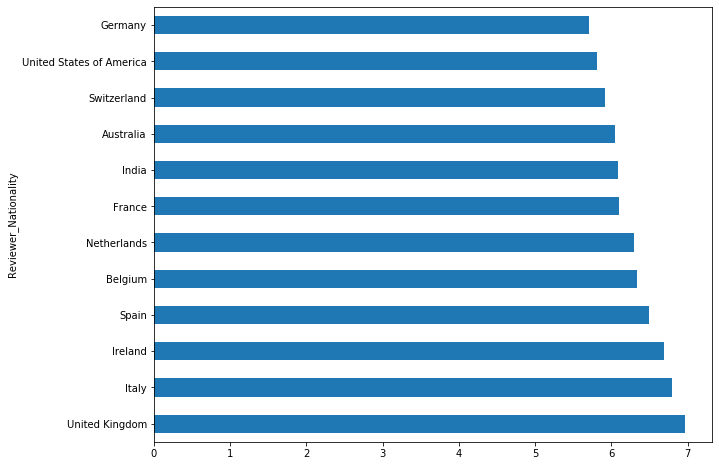

In [62]:
df = df.head(20)
df['mean'].plot(kind="barh", figsize=FIG_SIZE)

In the above picture we can see that fixed at a specific hotel and considering only countries with at least a specific threshold of reviews (in this case 20), people from Switzerland tend to assign in average a lower score with respect to people from the UK. 

**What wrods are used the most in positive or in negative reviews?**

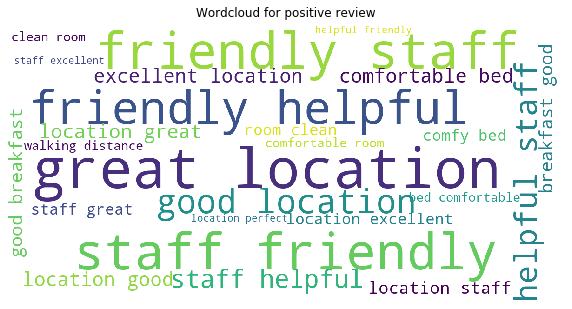

In [63]:
wordcloud = WordCloud(background_color='white', scale=3, max_font_size=40, max_words=25).generate_from_text(' '.join(list(Hotel_Reviews['Positive_Review'])))
wordcloud.recolor(random_state=1)
plt.figure(1, figsize=FIG_SIZE)
plt.imshow(wordcloud)
plt.title("Wordcloud for positive review")
plt.axis("off")
plt.show()

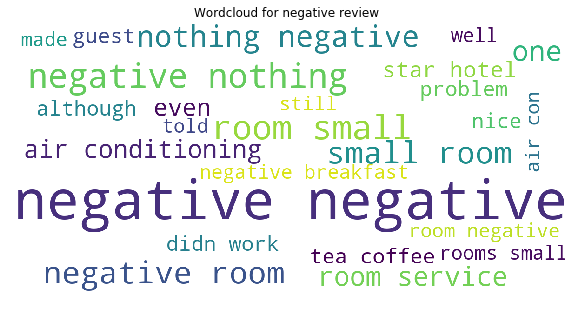

In [64]:
wordcloud = WordCloud(background_color='white', scale=3, max_font_size=40, max_words=25).generate_from_text(' '.join(list(Hotel_Reviews['Negative_Review'])))
wordcloud.recolor(random_state=1)
plt.figure(1, figsize=FIG_SIZE)
plt.imshow(wordcloud)
plt.title("Wordcloud for negative review")
plt.axis("off")
plt.show()

### Feature Engineering
**Feature Engineering for Tag Column**

We are going to explore the tags column to see what values it is made up of and see if we can select certain values to create additional features that will be added to our Recomender System.

In [65]:
Hotel_Reviews["Tags"]

0         [' Leisure trip ', ' Couple ', ' Duplex Double...
1         [' Leisure trip ', ' Couple ', ' Duplex Double...
2         [' Leisure trip ', ' Family with young childre...
3         [' Leisure trip ', ' Solo traveler ', ' Duplex...
4         [' Leisure trip ', ' Couple ', ' Suite ', ' St...
5         [' Leisure trip ', ' Group ', ' Duplex Double ...
6         [' Leisure trip ', ' Group ', ' Duplex Twin Ro...
7         [' Leisure trip ', ' Couple ', ' Duplex Double...
8         [' Leisure trip ', ' Couple ', ' Duplex Double...
9         [' Leisure trip ', ' Couple ', ' Large King Ro...
10        [' Leisure trip ', ' Group ', ' Duplex Double ...
11        [' Business trip ', ' Solo traveler ', ' Duple...
12        [' Leisure trip ', ' Solo traveler ', ' Duplex...
13        [' Business trip ', ' Solo traveler ', ' Duple...
14        [' Leisure trip ', ' Family with young childre...
15        [' Leisure trip ', ' Couple ', ' Duplex Double...
16        [' Leisure trip ', ' Family wi

In [66]:
# For typing simplciity I will make the following change, it is quicker to type df instead of Hotel_Reviews
df = Hotel_Reviews

In [67]:
hotelLeisureCounts = df[df['Tags'].str.contains('Leisure')].groupby('Hotel_Name')['Hotel_Name'].count().sort_values(ascending=False)
print ("Leisure Trip Counts: ", len(hotelLeisureCounts))
#print(hotelLeisureCounts)

hotelBusinessCounts = df[df['Tags'].str.contains('Business')].groupby('Hotel_Name')['Hotel_Name'].count().sort_values(ascending=False)
print ("Business Trip Counts: ", len(hotelBusinessCounts))
#print(hotelBusinessCounts)

hotelSoloCounts = df[df['Tags'].str.contains('Solo')].groupby('Hotel_Name')['Hotel_Name'].count().sort_values(ascending=False)
print ("Solo Traveller Trip Counts:", len(hotelSoloCounts))

hotelCoupleCounts = df[df['Tags'].str.contains('Couple')].groupby('Hotel_Name')['Hotel_Name'].count().sort_values(ascending=False)
print ("Couple Trip Counts: ", len(hotelCoupleCounts))

hotelGroupCounts = df[df['Tags'].str.contains('Group')].groupby('Hotel_Name')['Hotel_Name'].count().sort_values(ascending=False)
print ("Group Trip Counts: ", len(hotelGroupCounts))

hotelFamilyCounts = df[df['Tags'].str.contains('Family')].groupby('Hotel_Name')['Hotel_Name'].count().sort_values(ascending=False)
print ("Family Trip Counts: ", len(hotelFamilyCounts))

Leisure Trip Counts:  1492
Business Trip Counts:  1488
Solo Traveller Trip Counts: 1491
Couple Trip Counts:  1492
Group Trip Counts:  1481
Family Trip Counts:  1486


Let's add the tags as columns to our data

In [68]:
tags = ['Leisure', 'Business', 'Solo', 'Couple', 'Group', 'Family']

for tag in tags:
    df[tag] = False
    df[tag] = df['Tags'].map(lambda x: True if tag in x else False)

* We will now take a look at which hotels are more popular for each one of the cohorts we create above. 

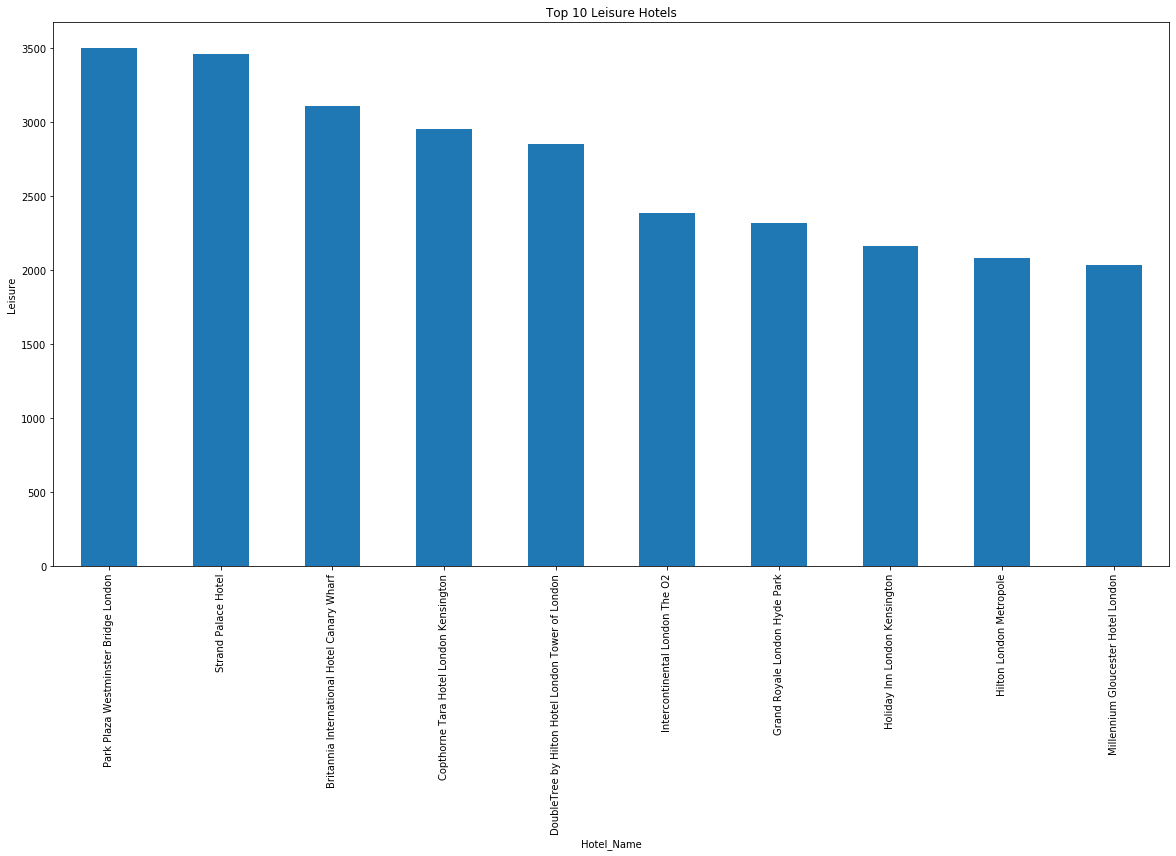

In [69]:
from matplotlib import pyplot as plt
topLeisureHotels = df[df['Tags'].str.contains('Leisure')].groupby('Hotel_Name')['Hotel_Address'].count().sort_values(ascending=False).head(10)
s = pd.Series([1,2,3], index=['a','b','c'])
s.plot.bar(figsize=(20,10))
plt.xlabel('Hotel Name')
plt.ylabel('Leisure')
plt.title('Top 10 Leisure Hotels')
topLeisureHotels.plot(kind = 'bar')
plt.show()

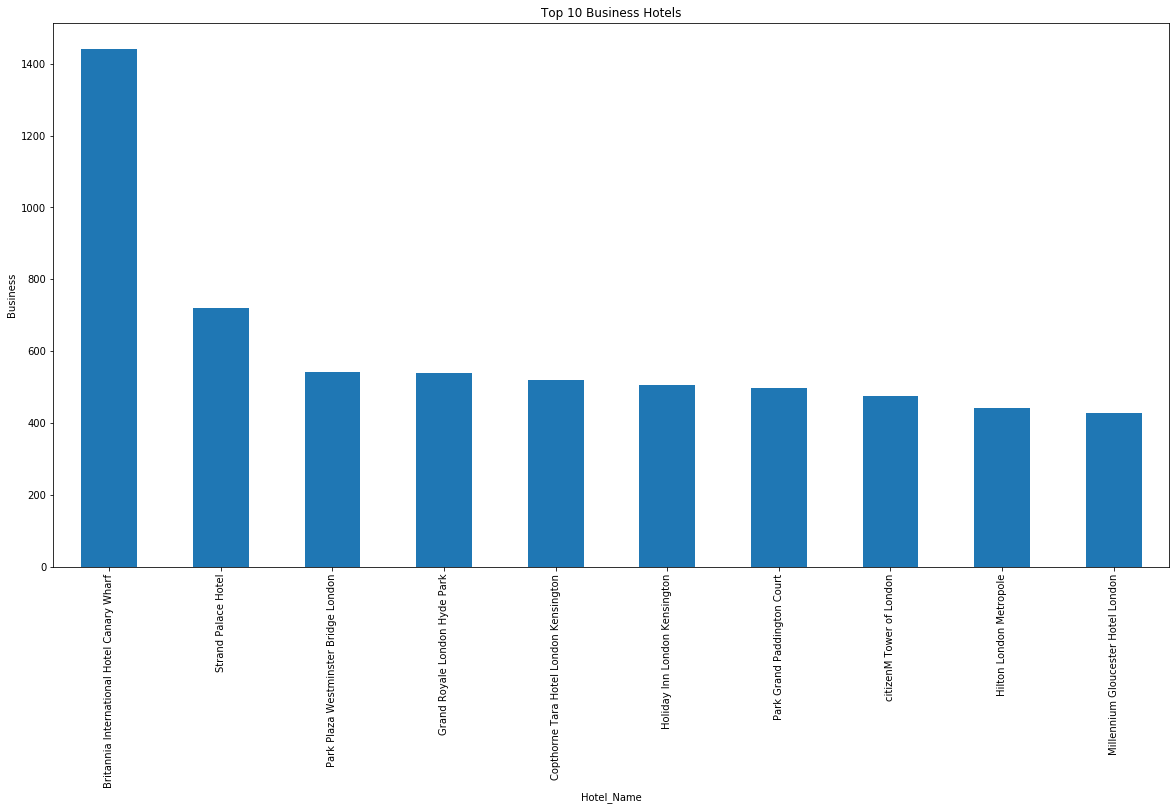

In [70]:
topBusinessHotels = df[df['Tags'].str.contains('Business')].groupby('Hotel_Name')['Hotel_Address'].count().sort_values(ascending=False).head(10)
s = pd.Series([1,2,3], index=['a','b','c'])
s.plot.bar(figsize=(20,10))
plt.xlabel('Hotel')
plt.ylabel('Business')
plt.title('Top 10 Business Hotels')
topBusinessHotels.plot(kind = 'bar')
plt.show()

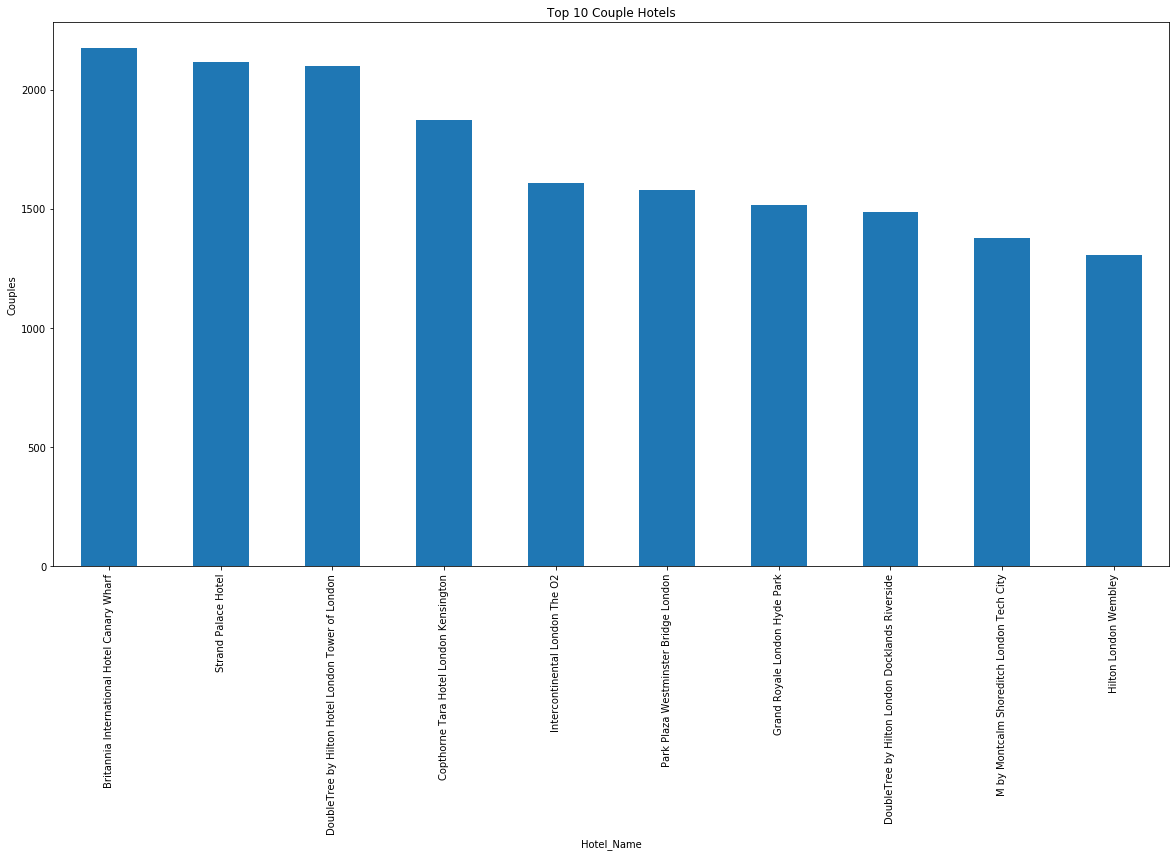

In [71]:
withCoupleDestination = df[df['Tags'].str.contains('Couple')].groupby('Hotel_Name')['Hotel_Address'].count().sort_values(ascending=False).head(10)
s = pd.Series([1,2,3], index=['a','b','c'])
s.plot.bar(figsize=(20,10))
plt.xlabel('Hotel')
plt.ylabel('Couples')
plt.title('Top 10 Couple Hotels')
withCoupleDestination.plot(kind = 'bar')
plt.show()

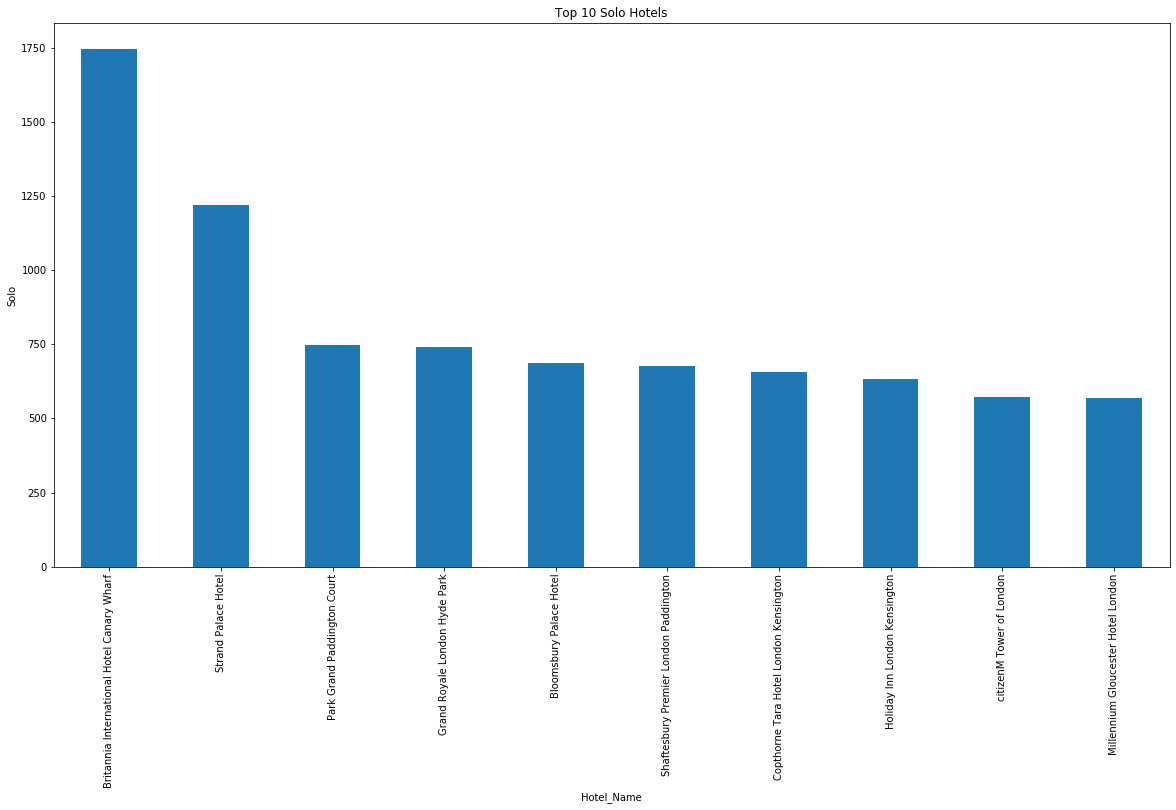

In [72]:
soloDestination = df[df['Tags'].str.contains('Solo traveler')].groupby('Hotel_Name')['Hotel_Address'].count().sort_values(ascending=False).head(10)
s = pd.Series([1,2,3], index=['a','b','c'])
s.plot.bar(figsize=(20,10))
plt.xlabel('Hotel')
plt.ylabel('Solo')
plt.title('Top 10 Solo Hotels')
soloDestination.plot(kind = 'bar')
plt.show()

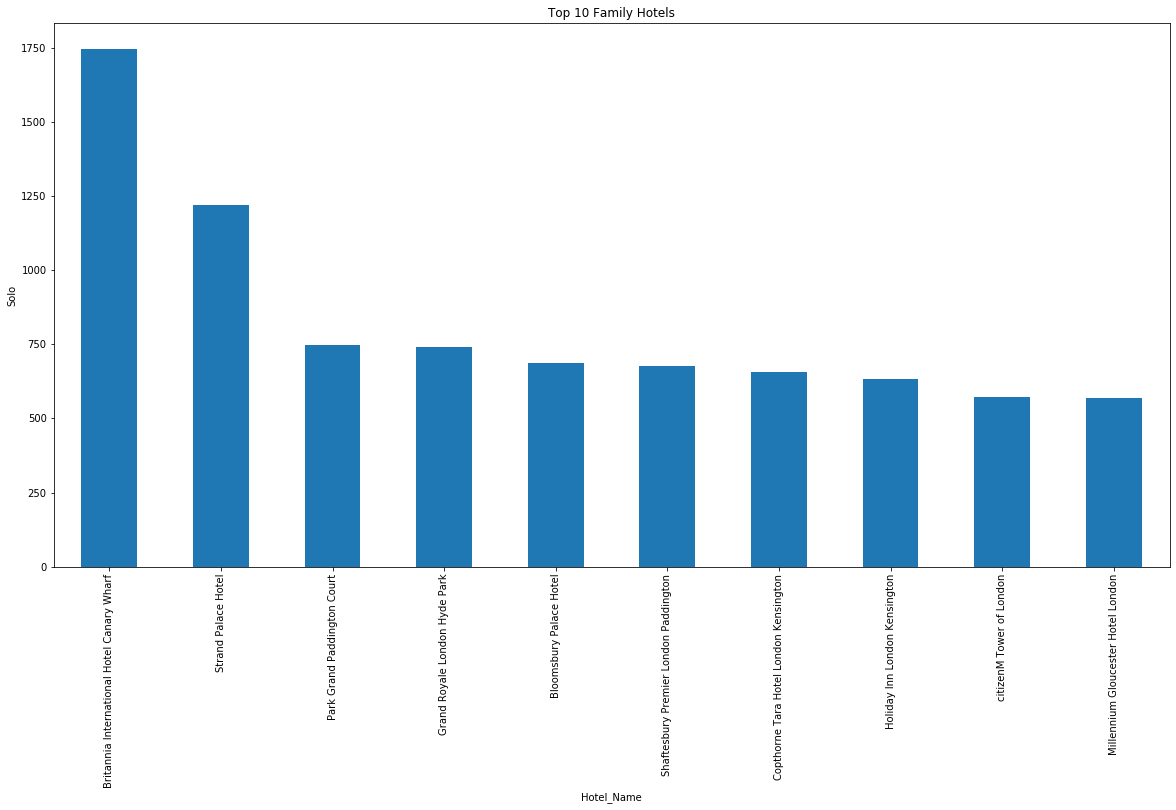

In [73]:
familyDestination = df[df['Tags'].str.contains('Family')].groupby('Hotel_Name')['Hotel_Address'].count().sort_values(ascending=False).head(10)
s = pd.Series([1,2,3], index=['a','b','c'])
s.plot.bar(figsize=(20,10))
plt.xlabel('Hotel')
plt.ylabel('Solo')
plt.title('Top 10 Family Hotels')
soloDestination.plot(kind = 'bar')
plt.show()

For code and notebook cleanliness, we have deleted the block of code that would print all of the different strings in the "Tags" column. 
Howwever from manually looking at the content of the column, we have noticed the above are the different possibilities in which individuals travel together and make reviews, as well as the purpose of their travels. 

Therefore we can categorize the trips as: 

1. Individuals Traveling:
    * Solo Trips
    * Couple Trips
    * Group Trips
    * Family Trips


2. Purpose of the Trip:
    * Leisure Trips
    * Business Trips

In [74]:
#I will create a new dataframe based on the tags(binary output), this dataframe will later be merged
df_tags=pd.DataFrame(index=df['Hotel_Name'].unique().tolist())
df_tags['Business']=0;
df_tags['Leisure']=0;
df_tags['Solo']=0;
df_tags['Couple']=0;
df_tags['Group']=0;
df_tags['Family']=0;

This creates a dataframe that looks like the one below. Where all of our entries are aggregated on the name of the Hotel. 

In [75]:
df_tags.head(2)

,Business,Leisure,Solo,Couple,Group,Family
Hotel Arena,0,0,0,0,0,0
K K Hotel George,0,0,0,0,0,0


In [76]:
uniqueHotels=df['Hotel_Name'].unique().tolist()
for hotel in uniqueHotels:
    #Update Trip type columns
    if hotel in hotelBusinessCounts and hotel in hotelLeisureCounts:
        if hotelLeisureCounts[hotel] > hotelBusinessCounts[hotel]:
            df_tags.at[hotel, 'Leisure'] = 1
        elif hotelLeisureCounts[hotel] < hotelBusinessCounts[hotel]:
            df_tags.at[hotel, 'Business'] = 1
        else:
            df_tags.at[hotel, 'Leisure'] = 1
            df_tags.at[hotel, 'Business'] = 1
    elif hotel in hotelBusinessCounts and hotel not in hotelLeisureCounts:
        df_tags.at[hotel, 'Business'] = 1
    elif hotel in hotelLeisureCounts and hotel not in hotelBusinessCounts:
        df_tags.at[hotel, 'Leisure'] = 1
        
    if hotel in hotelSoloCounts and hotel in hotelCoupleCounts and hotel in hotelGroupCounts and hotel in hotelFamilyCounts :
        soloCount=hotelSoloCounts[hotel]
        coupleCount=hotelCoupleCounts[hotel]
        groupCount=hotelGroupCounts[hotel]
        familyCount=hotelFamilyCounts[hotel]

        if soloCount>coupleCount and soloCount>groupCount and soloCount>familyCount:
            df_tags.at[hotel, 'Solo'] = 1
        elif coupleCount>soloCount and coupleCount>groupCount and coupleCount>familyCount:
            df_tags.at[hotel, 'Couple'] = 1
        elif groupCount>soloCount and groupCount>coupleCount and groupCount>familyCount:
            df_tags.at[hotel, 'Group'] = 1
        elif familyCount>soloCount and familyCount>coupleCount and familyCount>groupCount:
            df_tags.at[hotel, 'Family'] = 1
        elif soloCount==coupleCount and soloCount>groupCount and soloCount>familyCount:
            df_tags.at[hotel, 'Solo'] = 1
            df_tags.at[hotel, 'Couple'] = 1
        elif soloCount==groupCount and soloCount>coupleCount and soloCount>familyCount:
            df_tags.at[hotel, 'Solo'] = 1
            df_tags.at[hotel, 'Group'] = 1
        elif soloCount==familyCount and soloCount>coupleCount and soloCount>groupCount:
            df_tags.at[hotel, 'Solo'] = 1
            df_tags.at[hotel, 'Family'] = 1
        elif coupleCount==groupCount and coupleCount>soloCount and coupleCount>familyCount:
            df_tags.at[hotel, 'Couple'] = 1
            df_tags.at[hotel, 'Group'] = 1
        elif coupleCount==familyCount and coupleCount>soloCount and coupleCount>groupCount:
            df_tags.at[hotel, 'Couple'] = 1
            df_tags.at[hotel, 'Family'] = 1
        else:
            df_tags.at[hotel, 'Solo'] = 1
            df_tags.at[hotel, 'Couple'] = 1
            df_tags.at[hotel, 'Group'] = 1
            df_tags.at[hotel, 'Family'] = 1
            

In [77]:
df_tags.head()

,Business,Leisure,Solo,Couple,Group,Family
Hotel Arena,0,1,0,1,0,0
K K Hotel George,0,1,0,1,0,0
Apex Temple Court Hotel,0,1,0,1,0,0
The Park Grand London Paddington,0,1,0,1,0,0
Monhotel Lounge SPA,0,1,0,1,0,0


In [78]:
df_tags.describe()

,Business,Leisure,Solo,Couple,Group,Family
count,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000
mean,0.012064,0.989276,0.079759,0.861930,0.002011,0.054290
std,0.109210,0.103034,0.271010,0.345089,0.044811,0.226664
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
df_tags.shape

(1492, 6)

* We have created a dataframe with each unique hotel and computed results as binary for what hotel is more popular than others when it comes to particular type of trip, and the individuals going on that trip. 

Furthermore, from the tags we can extract the number of nights the reviewers stayed in the hotel

In [80]:
def extract_nights(tags):
    nights = re.search('(?s)(?<=Stayed).*?(?=night)', tags, re.IGNORECASE)
    if nights:
        nights = nights.group(0).strip()
        return nights

In [81]:
df["Nights"] = df['Tags'].map(extract_nights)

In [82]:
df['Mobile'] = df['Tags'].map(lambda x: True if ' Submitted from a mobile device ' in x else False)

#### Feature Engineering: Sentiment Analysis

* We are going to be using Natural Language Processing techniques and extract emotions from the raw text reviews in order to construct a sentiment analysis. This feature will be later used when we implement it into our recommender system to give more precise recommendations.  

* For each review we will be predicting if it corresponds to a positve or negative review.
    * We will consider positive reviews when the score is 5 or higher
    * We will be consider negative reviews to have an overall score that is less than 5. 

In [83]:
# reviews_df = pd.read_csv("Hotel_Reviews.csv")
reviews_df = df

In [84]:
# extracting new columne review_text by merging postitive and negative review column
reviews_df['review'] = reviews_df.apply(lambda row: row["Negative_Review"] + " " + row["Positive_Review"], axis=1)

In [85]:
reviews_df.head(1)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,...,Reviewer_Tourist,Leisure,Business,Solo,Couple,Group,Family,Nights,Mobile,review
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Russia,i am so angry that i made this post available ...,397,1403,only the park outside of the hotel was beautiful,...,True,True,False,False,True,False,False,6,False,i am so angry that i made this post available ...


In [86]:
# separating good from bad reviews
reviews_df["is_bad_review"] = reviews_df["Reviewer_Score"].apply(lambda x: 1 if x < 5 else 0)

In [87]:
reviews_df[["Hotel_Name", "review", "is_bad_review"]].sample(5)

,Hotel_Name,review,is_bad_review
151282,Royal Hotel Champs Elys es,rooms personal,0
151224,Royal Hotel Champs Elys es,bathroom has no standing shower cabint but bat...,0
312274,Best Western Premier Hotel Couture,rooms are a bit small in size beds are very sm...,0
124685,DoubleTree by Hilton London Docklands Riverside,only thing i could pick fault with is i was ho...,0
242980,Hotel Cavendish,nothing great location,0


Given the size our dataset, and having learned some lessons in our last assignment we will be sampling the data to increase computational speed, and be able to run this notebook without any issues multiple times. This assignment was done collaboratively on Kaggle and computational efficiency was a priority. 

In [88]:
reviews_df = reviews_df.sample(frac = 0.25, replace = False, random_state=42)

In [89]:
# remove 'No Negative' or 'No Positive', we are looking for actual reviews
reviews_df["review"] = reviews_df["review"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))

We are only going to be considering reviews that are either negative or positive. Reviews that are indiferent or have no negative or positive will be removed as they provide no insight. 

In [90]:

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def clean_text(text):
    text = text.lower()
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    text = [word for word in text if not any(c.isdigit() for c in word)]
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    text = [t for t in text if len(t) > 0]
    pos_tags = pos_tag(text)
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    lemmas = [t for t in text if len(t) > 1]
    text = " ".join(lemmas)
    return text

# clean text data
reviews_df["review_clean"] = reviews_df["review"].apply(lambda x: clean_text(x))

In [91]:
# Save a checkpoint of the data, just in case
reviews_df.to_csv("Hotel_Reviews_NLP_Partial.csv", index=False)

**Disclaimer: this does not seem to be working in Kaggle, we need to find a way for it to work. It does work on Jupyter**

We have cleaned the data using a combination of transformations with the NLTK and String library:

* lower the text
* tokenize the text (split the text into words) and remove the punctuation
* remove useless words that contain numbers
* remove useless stop words like 'the', 'a' ,'this' etc.
* lemmatize the text: transform every word into their root form (e.g. rooms -> room, slept -> sleep)
* Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a verb etc. using the WordNet lexical database

In [92]:
# add sentiment anaylsis columns
sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["review"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)

In [93]:
reviews_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,...,Family,Nights,Mobile,review,is_bad_review,review_clean,neg,neu,pos,compound
499860,Vondelstraat 18 30 Oud West 1054 GE Amsterdam ...,248,2016-04-23,8.0,Hotel Vondel Amsterdam,Israel,small rooms and the beds are freakishly high,9,1952,staff is very nice and helpful bathroom is wel...,...,False,1,False,small rooms and the beds are freakishly high s...,0,small room bed freakishly high staff nice help...,0.062,0.589,0.349,0.8051
453739,Sonnenhofgasse 8 10 05 Margareten 1050 Vienna ...,284,2016-04-15,8.2,Austria Trend Hotel Ananas Wien,Portugal,noise from the corridor,5,4217,very good localization in front of the undergr...,...,False,2,False,noise from the corridor very good localization...,0,noise corridor good localization front undergr...,0.000,0.790,0.210,0.4927
484096,Via Napo Torriani 18 Central Station 20124 Mil...,384,2017-05-17,9.2,Hotel Berna,United Kingdom,some hot vegetarian food at breakfast would ha...,14,4017,everything,...,False,3,False,some hot vegetarian food at breakfast would ha...,0,hot vegetarian food breakfast would make break...,0.000,0.818,0.182,0.4404
415438,Plaza Espa a 6 8 Sants Montju c 08014 Barcelon...,419,2016-05-21,8.4,Catalonia Barcelona Plaza,United Kingdom,can t fault anything about this hotel,8,4527,great location fantastic view of the city from...,...,False,2,True,can t fault anything about this hotel great lo...,0,fault anything hotel great location fantastic ...,0.070,0.679,0.251,0.7845
248620,8 Northumberland Avenue Westminster Borough Lo...,602,2015-11-01,8.5,Club Quarters Hotel Trafalgar Square,United Kingdom,we were unable to get our taxi to the door of ...,85,2494,room was relatively quiet apart from two metal...,...,False,1,False,we were unable to get our taxi to the door of ...,1,unable get taxi door hotel saturday october no...,0.118,0.882,0.000,-0.8826


The first features that we began adding were features that were relevant to determining if customers reviews are highly linked to how they felt about their hotel experience. 

We used Vader, from the NLTK library. This import will use a lexicon of words to find the ones that are positive or negative, while also taking into account the context of the sentence. 

The output of this feature will consist of:
* A neutrality score (`neu`)
* A positivity score (`pos`)
* A negativity score (`neg`)
* Lastly, an overall score that summarizes the three scores mentioned above (`compound`)


In [94]:
# add number of characters column
reviews_df["nb_chars"] = reviews_df["review"].apply(lambda x: len(x))

# add number of words column
reviews_df["nb_words"] = reviews_df["review"].apply(lambda x: len(x.split(" ")))

In [95]:
# create doc2vec vector columns

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(reviews_df["review_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = reviews_df["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
reviews_df = pd.concat([reviews_df, doc2vec_df], axis=1)

We needed to create vector representation for every review, so we used the library Gensim that creates a numerical vector representation of every word in the corpus by taking into consideration the context in which the words are being used. 

This is done with shallow neural networks, so that similar words have similar representations.

Then we tranformed the vectors into numerical using the Doc2Vec. Same texts will also have similar representations and that is why we can use those vectors as training features.

In [96]:
# add tf-idfs columns
tfidf = TfidfVectorizer(min_df = 500)
tfidf_result = tfidf.fit_transform(reviews_df["review_clean"]).toarray()

In [97]:
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = reviews_df.index

In [98]:
reviews_df = pd.concat([reviews_df, tfidf_df], axis=1)

In [99]:
# Save a checkpoint of the data, just in case
reviews_df.to_csv("Hotel_Reviews_NLP_Partial.csv", index=False)

Finally we add the TF-IDF (Term Frequency - Inverse Document Frequency) for every review and every word in the reviews. 

This will take into account the relative importance of the words in the reviews. Words that are rare are incredibly insightful!

The TF-IDF achieves this by:
* computing the classic number of times the word is in a review
* IDF computes the relative importance of this word by seeing how many times it appears in other reviews.

Lastly, we are adding TF-IDF columns only for every word that is in a minimum of about 1% of the total number of reviews. 

In [100]:
reviews_df.shape

(128803, 701)

In [101]:
# show is_bad_review distribution
reviews_df["is_bad_review"].value_counts(normalize = True)

0    0.957136
1    0.042864
Name: is_bad_review, dtype: float64

In [102]:
# Save a checkpoint of the data, just in case
reviews_df.to_csv("Hotel_Reviews_NLP_Partial.csv", index=False)

* Only 5% of reviews are considered negative based on the parameter that we established. This translates to having a very imbalanced dataset based on the parameters that we determiend for postive or negative review. We will be using ROC/AUC to measure how accurate our Sentiment Analysis is. 

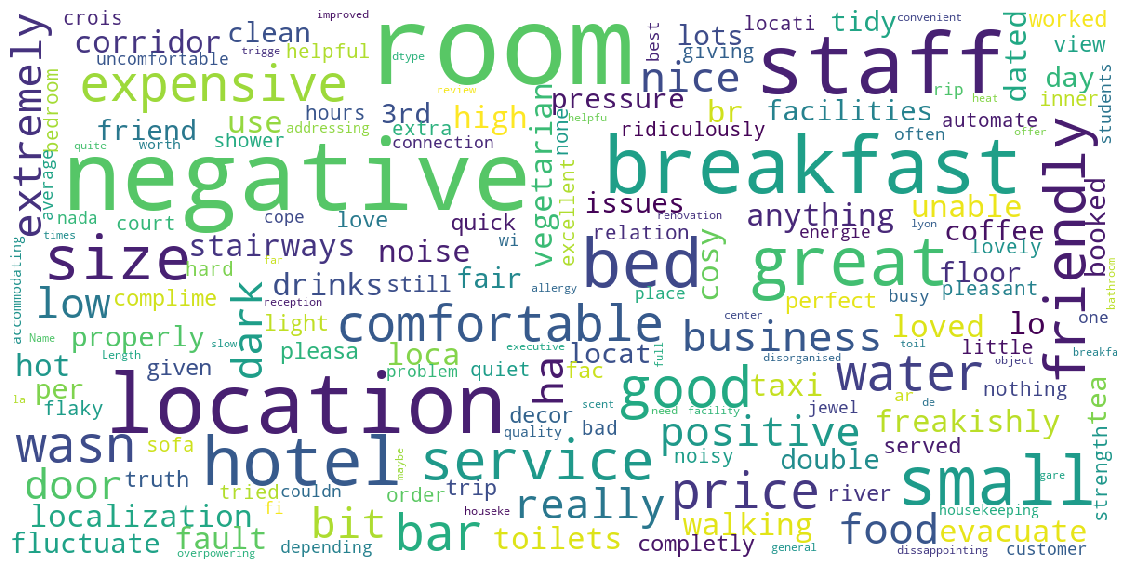

In [103]:
# wordcloud function

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(reviews_df["review"])

Using the WordCloud library we printed the most common words found in the reviews. 
* Most of the comments are associated with the room and physical aspects of the hotel: Room, Location, Breakfast, Excellent
* And other are related to the service or the experience of the hotel: Welcoming, Staff, Lovely, etc...

In [104]:
# highest positive sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("pos", ascending = False)[["review_clean", "pos"]].head(10)

,review_clean,pos
34219,pretty happy really amazing location,0.846
498116,great value staff excellent,0.836
438829,warm friendly,0.836
293418,overall like lovely comfortable room,0.832
266239,lovely lovely lovely build wonderful location ...,0.825
246326,good location fair cost great,0.823
44019,beautiful elegant extremely welcome,0.815
304532,good good thanks,0.813
12591,great location great service,0.804
451852,good friendly helpful staff great location com...,0.803


You can see the results of our most positive reviews based on the sentiment analysis.
Below you can see the ones that have the highest negative sentiment. 

In [105]:
# lowest negative sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("neg", ascending = False)[["review_clean", "neg"]].head(10)

,review_clean,neg
225249,nothing perfect great great great,0.928
241688,negative downside,0.910
116130,negative complain,0.894
435968,negative extremely central complaint,0.847
140235,negative goid complaint,0.844
323453,negative bad internet,0.829
358699,negative bad deal,0.829
209542,negative bad,0.829
233260,negative dirty cramp,0.815
381316,negative fault anything,0.811


We might have to fix this, some of the words like "No" or "Nothing" are being considered negative. I am not sure how much this is being the case.

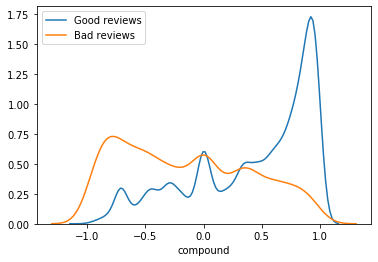

In [106]:
# plot sentiment distribution for positive and negative reviews

for x in [0, 1]:
    subset = reviews_df[reviews_df['is_bad_review'] == x]
    
    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

* The above graph shows the distribution of the reviews sentiments among good reviews and bad ones. Good reviews are for most of them considered as very positive by Vader. On the contrary, bad reviews tend to have lower compound sentiment scores.

* This shows us that previously computed sentiment features will be very important in our modelling part.

In [107]:
# feature selection
label = "is_bad_review"
ignore_cols = [label, 'Hotel_Address', 'Additional_Number_of_Scoring', 
               'Review_Date','Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
               'Negative_Review', 'Review_Total_Negative_Word_Counts',
               'Total_Number_of_Reviews', 'Positive_Review',
               'Review_Total_Positive_Word_Counts',
               'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
               'days_since_review', 'lat', 'lng', 'Hotel_Country', 'Country_Sea',
               'Is_Positive', 'Is_Negative', 'Reviewer_Tourist', 'Leisure', 'Business',
               'Solo', 'Couple', 'Group', 'Family', 'Nights', 'Mobile', 'review',
               'is_bad_review', 'review_clean']
features = [c for c in reviews_df.columns if c not in ignore_cols]

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(reviews_df[features], reviews_df[label], test_size = 0.20, random_state = 42)

In [108]:
# train a random forest classifier
rf = RandomForestClassifier(n_estimators = 200, random_state = 42, max_depth=10, max_features=250)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

,feature,importance
3,compound,0.195407
2,pos,0.086775
447,word_positive,0.077918
183,word_dirty,0.059513
57,word_bad,0.039414
403,word_nothing,0.032301
6,doc2vec_vector_0,0.022683
5,nb_words,0.022217
4,nb_chars,0.020286
496,word_rude,0.019236


The most important features are the ones that come from our sentiment analysis. Meanwhile the vector representations of the texts are also important in our training. 

We can also see how some words (distinguished by word_"word") are also of high importance. 


### We can do a GridSearch for the best parameters on the Random Forest, however based on the computing power I opted not to. We however may want to consider this for later. 

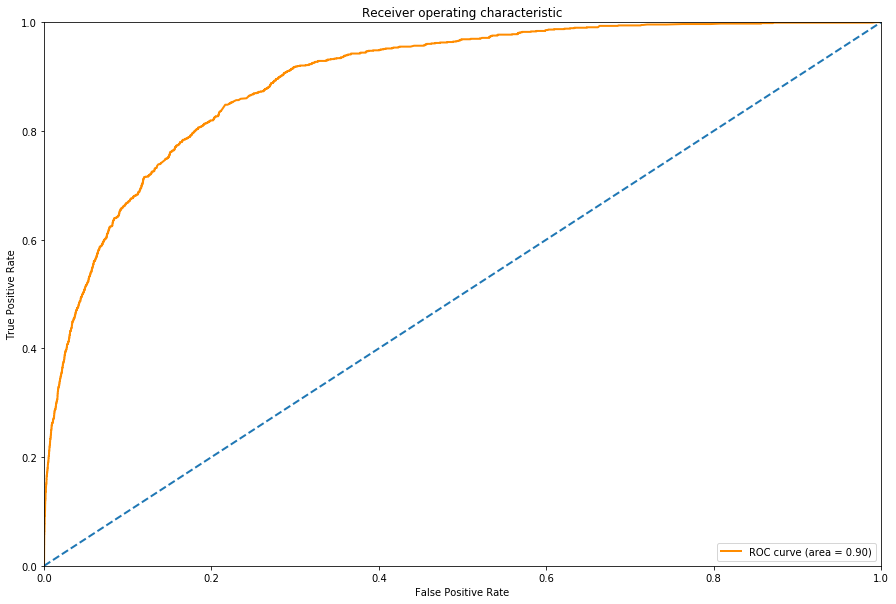

In [109]:
# ROC curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.41')

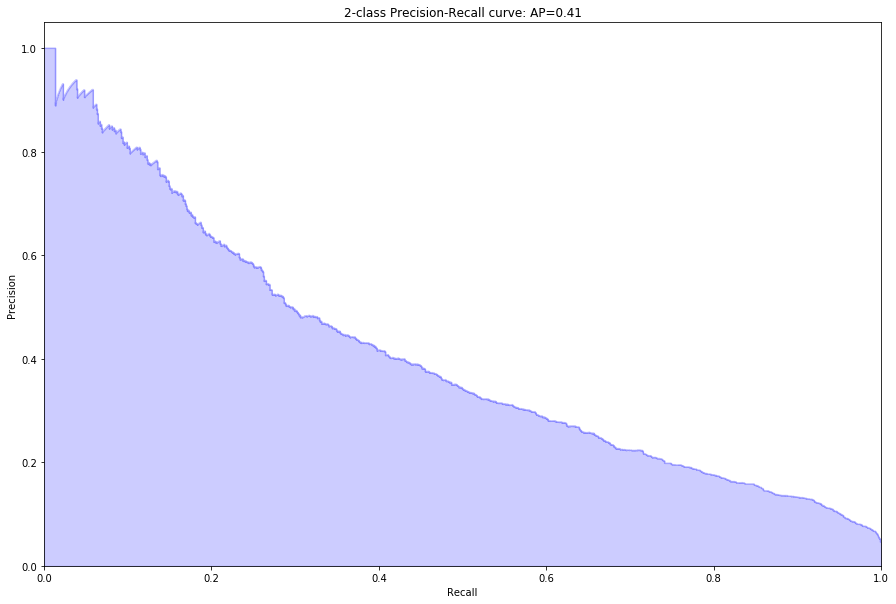

In [110]:
average_precision = average_precision_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, y_pred)

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize = (15, 10))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

* The ROC (Receiver Operating Characteristic) curve is usually a good graph to summarize the quality of our classifier. 
    * The higher the curve is  the better the predictions. However we should not use it to assess the quality of our model. Our dataset is very imbalanced which is why the false positive predictions will tend to be very low.  Our model will be able to make a lot of false positives predictions and still have a low false positive rate, while increasing the true positive rate and therefore artificially increasing the AUC ROC metric.




* A better metric in this imbalanced situation is the AUC PR (Area Under the Curve Precision Recall), or also called AP (Average Precision).
    * need to run and write up

# Export Data

At this point, we can export all the data into a CSV file to be able to re-use it later.

In [111]:
reviews_df.to_csv("Hotel_Reviews_NLP.csv", index=False)

### Recommender System based on Reviews

* I am building a Content-Based Recommender that will recommend hotels that are similar to other hotels. In order to do this we will be computing similarity scores for all hotels based on their reviews, distance to attractions, what cohort of travelers prefers them more, purpose of the trip etc...
    * We will then recommend hotels based on that similarity score. 


### I am starting small!! 

In [112]:
reviews_df.shape

(128803, 701)

In [113]:
# clean_review = pd.read_csv("/Users/sofiagarfias/Downloads/Hotel_Reviews 2.csv")
clean_review = reviews_df

In [114]:
clean_review = clean_review.groupby('Hotel_Name').agg({
                             'Negative_Review': ', '.join,'Positive_Review': ', '.join}).reset_index()

In [115]:
clean_review.head()

,Hotel_Name,Negative_Review,Positive_Review
0,11 Cadogan Gardens,the plug sockets in the room where not near a ...,the hotel was unique the staff where friendly ...
1,1K Hotel,ongoing problems with room wifi which was very...,great very helpful staff lovely food and peruv...
2,25hours Hotel beim MuseumsQuartier,it was unfortunate that the bed was very soft ...,the look and feel the staff the breakfast the ...
3,41,"can t think of anything, no negative, that we ...","the service, the room the lounge and the staff..."
4,45 Park Lane Dorchester Collection,we didn t see another english guest and it app...,the staff were absolutely wonderful and couldn...


In [116]:
clean_review.shape

(1492, 3)

In [117]:
clean_review['review_text'] = clean_review['Positive_Review'].astype(str) + clean_review['Negative_Review'].astype(str)

In [118]:
#findout similarity between the reviews of hotel using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
clean_review['review_text'] = clean_review['review_text'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(clean_review['review_text'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape
#You see that over 80,000 different words were used to describe the 1492 hotels in dataset.

(1492, 40519)

In [119]:
#used linear_kernal method for calculating similarity between the hotels.
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [120]:
#Construct a reverse map of indices and hotel names
indices = pd.Series(clean_review.index, index=clean_review['Hotel_Name']).drop_duplicates()

In [121]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the hotel that matches the hotel_name
    idx = indices[title]

    # Get the pairwsie similarity scores of all hotels with that hotel
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the hotels based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar hotels
    sim_scores = sim_scores[1:11]

    # Get the hotel indices
    hotel_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar hotel
    return clean_review['Hotel_Name'].iloc[hotel_indices]

In [122]:
get_recommendations('Hotel Arena')

1140                         Park Plaza London Riverbank
495                   Hampshire Hotel Amsterdam American
369                        Grand Royale London Hyde Park
1384                                The Principal London
819              INK Hotel Amsterdam MGallery by Sofitel
1399                    The Student Hotel Amsterdam City
182                          Boutique Hotel Notting Hill
1049    NH Collection Amsterdam Grand Hotel Krasnapolsky
1143                       Park Plaza Victoria Amsterdam
1181                        Radisson Blu Hotel Amsterdam
Name: Hotel_Name, dtype: object